In [0]:
# import mlflow
# mlflow.autolog(disable=True)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
pd1 = spark.sql("select * from feifei_wang.diabetes_modified").toPandas() # Read in table, then create a pandas dataframe 
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
X = pd1[feature_cols] # Features
y = pd1.Outcome # Target variable
display(pd1)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,random_0_10,BMI_categorical,Outcome_categorical
6,148,72,35,0,33.6,0.627,50,1,3.337745777383012,5_obesity,1_diabetes
1,85,66,29,0,26.6,0.351,31,0,8.343598043665551,4_over_weight,0_not_diabetes
8,183,64,0,0,23.3,0.672,32,1,7.791551207261036,3_healthy_weight,1_diabetes
1,89,66,23,94,28.1,0.167,21,0,5.064556301524508,4_over_weight,0_not_diabetes
0,137,40,35,168,43.1,2.288,33,1,3.894705250032773,6_class3_obesity,1_diabetes
5,116,74,0,0,25.6,0.201,30,0,4.529999492915101,4_over_weight,0_not_diabetes
3,78,50,32,88,31.0,0.248,26,1,5.745149270387947,5_obesity,1_diabetes
10,115,0,0,0,35.3,0.134,29,0,9.262686849651136,5_obesity,0_not_diabetes
2,197,70,45,543,30.5,0.158,53,1,2.1639864604687906,5_obesity,1_diabetes
8,125,96,0,0,0.0,0.232,54,1,1.0495174051455336,1_undefined,1_diabetes


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [0]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train) # Note that MLflow is autologging the parameters and metrics of the model information

y_pred = logreg.predict(X_test)

/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(

In [0]:
# import mlflow
# mlflow.sklearn.log_model(
#         sk_model=logreg,
#         artifact_path="sklearn-model",
#         registered_model_name="ff-logistic-reg-diabetes-model"
#     )

In [0]:
pd_prediction_result = X_test.copy()
pd_prediction_result['y_pred']=y_pred
pd_prediction_result['y_true_label'] = y_test
display(pd_prediction_result)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_pred,y_true_label
3,163,70,18,105,31.6,0.268,28,1,1
8,74,70,40,49,35.3,0.705,39,0,0
1,73,50,10,0,23.0,0.248,21,0,0
5,136,82,0,0,0.0,0.64,69,0,0
1,90,62,18,59,25.1,1.268,25,0,0
8,167,106,46,231,37.6,0.165,43,1,1
1,143,74,22,61,26.2,0.256,21,0,0
7,106,92,18,0,22.7,0.235,48,0,0
2,115,64,22,0,30.8,0.421,21,0,0
0,124,56,13,105,21.8,0.452,21,0,0


## Appendix: Below are model performance checks

In [0]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Out[8]: array([[116, 9],
 [ 26, 41]])

Out[9]:

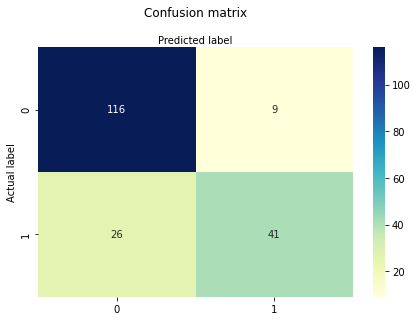

Text(0.5, 257.44, 'Predicted label')

In [0]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

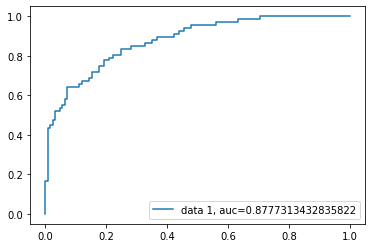

In [0]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
# reference: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

### public github databricks academy training materials:
https://github.com/databricks-academy

You can connect to repo under "repos tab" on the left by copy paster the github URL